# Census Income Analysis
---
*Employing various machine learning and deep learning methods to see which one can better use the census data to Predict whether income exceeds $50K/yr.*    

***
Najafabadi:
+ email: shahmoradi.iman@gmail.com 

## Download the dataset

This data was extracted from the census bureau database found at United States Census Bureau.   
*Donor: Ronny Kohavi and Barry Becker, Data Mining and Visualization Silicon Graphics.*

In [1]:
!pip3 install wget
import wget
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
file = wget.download(url)

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9672 sha256=9e9212ecd0923176b481befc782c1044e6ec4c43161e38afc06308c41626ef81
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


## Preprocessing
***
*After all, Machine Learning is Data-Driven AI, and your model will only be as powerful or as terrible as the data you provide.*

Read comma-separated values (csv) file into DataFrame using [**pandas.read_csv**](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) class.

In [2]:
import pandas as pd
header_list = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
               "occupation","relationship", "race", "sex", "capital-gain", "capital-loss",
               "hours-per-week", "native-country", "income"]
df = pd.read_csv('adult.data', skipinitialspace=True, names=header_list)
print(df.info())    #Print the data frame information
print("\n *******Duplications:", df.duplicated().sum())
ent = len(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None

 *******Duplications: 24


***
Clean the dataset of duplications. Delete the duplicated instances using [pandas.DataFrame.drop_duplicates](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html) class. It will return DataFrame with duplicate rows removed.

In [3]:
df.drop_duplicates(inplace=True, ignore_index=True) #remove duplicate rows
print(ent-len(df), "rows are removed")
ent = len(df) #Number of rows(instances) of dataframe

24 rows are removed


***
Calculate the portion of each column that contains incorrect values.

In [4]:
#Derive missing or noisy portion of data for each feature
for col in df.columns:
    if col == 'income':
       print('\n', col, ': missing/noisy portion of data=', len(df[df[col].isnull()]) / ent)
       continue

    print('\n', col, ': missing/noisy portion of data=', len(df[df[col].isnull() | df[col] < 1]) / ent)


 age : missing/noisy portion of data= 0.0

 workclass : missing/noisy portion of data= 0.0

 fnlwgt : missing/noisy portion of data= 0.0

 education : missing/noisy portion of data= 0.0

 education-num : missing/noisy portion of data= 0.0

 marital-status : missing/noisy portion of data= 0.0

 occupation : missing/noisy portion of data= 0.0

 relationship : missing/noisy portion of data= 0.0

 race : missing/noisy portion of data= 0.0

 sex : missing/noisy portion of data= 0.0

 capital-gain : missing/noisy portion of data= 0.9166487383594062

 capital-loss : missing/noisy portion of data= 0.9533146878937825

 hours-per-week : missing/noisy portion of data= 0.0

 native-country : missing/noisy portion of data= 0.0

 income : missing/noisy portion of data= 0.0


In the **capital-gain** and **capital-loss** columns more than 90% of data is not valid. To prevent negative influence on the model training process, We use [pandas.DataFrame.drop](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html) class to expel these columns.
***

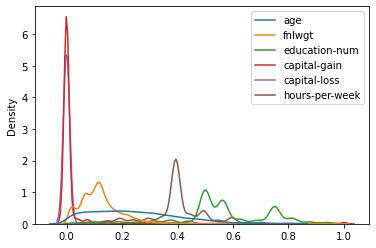

In [5]:
import seaborn as sns
df2 = df.select_dtypes(exclude='object')
sns.kdeplot(data=(df2-df2.min())/df2.max())

In [6]:
#df.drop(columns=['capital-gain', 'capital-loss'], inplace=True) #drop based on missing data
#df.info()

***
Determining the unknown or invalid values in categorical columns. there are unknown values in the dataset marked as **'?'** (*in the workclass, occupation, and native-country columns*).

In [7]:
for col in df.select_dtypes(include='object'):
  print('\n ',df[col].value_counts())


  Private             22673
Self-emp-not-inc     2540
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

  HS-grad         10494
Some-college     7282
Bachelors        5353
Masters          1722
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           645
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           332
1st-4th           166
Preschool          50
Name: education, dtype: int64

  Married-civ-spouse       14970
Never-married            10667
Divorced                  4441
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital-status, dtype: int64

  Prof-specialty       4136
Craft-repair         4094
Exec-managerial      4065
Adm-clerical

In [8]:
print('% of missing values : \n')
for col in df.select_dtypes(include='object'):
    perc = len(df[df[col] == '?']) / df.shape[0] * 100
    print('*', col, ':', f'{perc:.1f} %')

% of missing values : 

* workclass : 5.6 %
* education : 0.0 %
* marital-status : 0.0 %
* occupation : 5.7 %
* relationship : 0.0 %
* race : 0.0 %
* sex : 0.0 %
* native-country : 1.8 %
* income : 0.0 %


In Model training section we can either examine the Impact of elimination of **workclass** and **occupation** columns or corresponding rows on model performance.
***

In [9]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,1078.443741,87.368227,40.440329
std,13.637984,1.055565e+05,2.571633,7387.957424,403.101833,12.346889
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


***
Let's see if we are dealing with a balanced dataset or an imbalanced one. So we choose a suitable model evaluation method, and during the model training section, we employ balancing techniques.

In [10]:
print(f"{(df['income'] == '>50K').astype('int').sum() / df.shape[0] :.2f} of instances labeled as higher than 50k $.")

0.24 of instances labeled as higher than 50k $.


***
Pairwise analysis, Let's plot pair columns. The color indicates income classes. This visualization method assists you in detecting the combinations that make a more distinct pattern for the classification task.

# Visualization
***
*Data visualization allows you to view how the data looks. You can check to see if the features reflect the output. It also assists you in determining the type of data correlation you have.*  
Before training the model, Data scientist always should find the answer to these question:  
+ what are the most important features?
+ What are the useless features?

<Figure size 720x720 with 0 Axes>

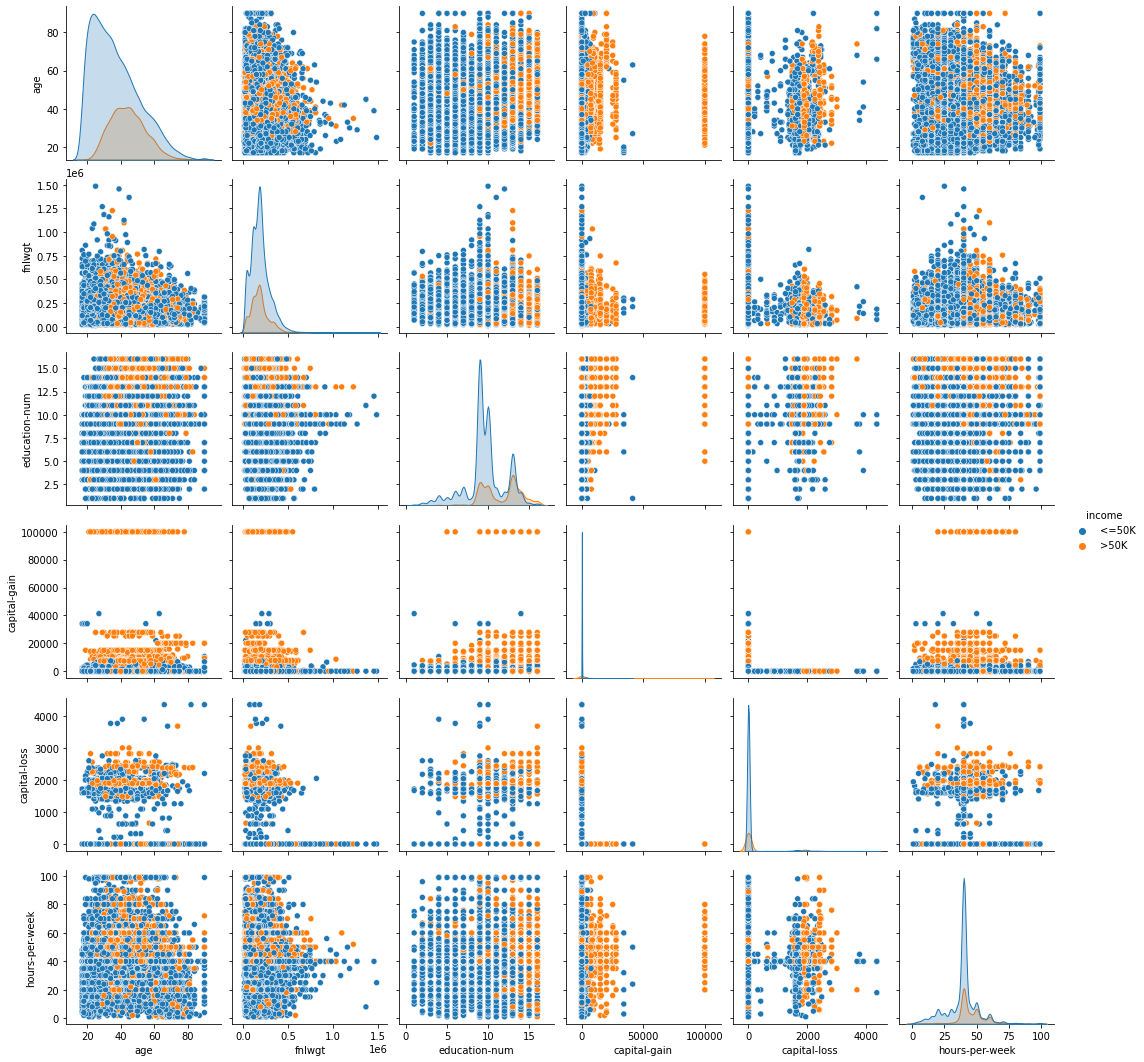

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(1, figsize=(10,10))
sns.pairplot(data=df, hue='income')
plt.show()

**age** vs **capital-gain** vs **hours-per-week**:  
It seems that this combination is capable of making distinct boundaries.
***

Let's now reveal the counts of observations in each category. This tool gives you insight into manual feature engineering. For instance, regarding the relationship category, husband and wife classes don't result in a considerable difference in income class, but on the opposite side are own-child, unmarried, other-relative, and not-in-family classes which cause the income class effectively. You can combine husband and wife classe, and on the other hand combine the rest classes.

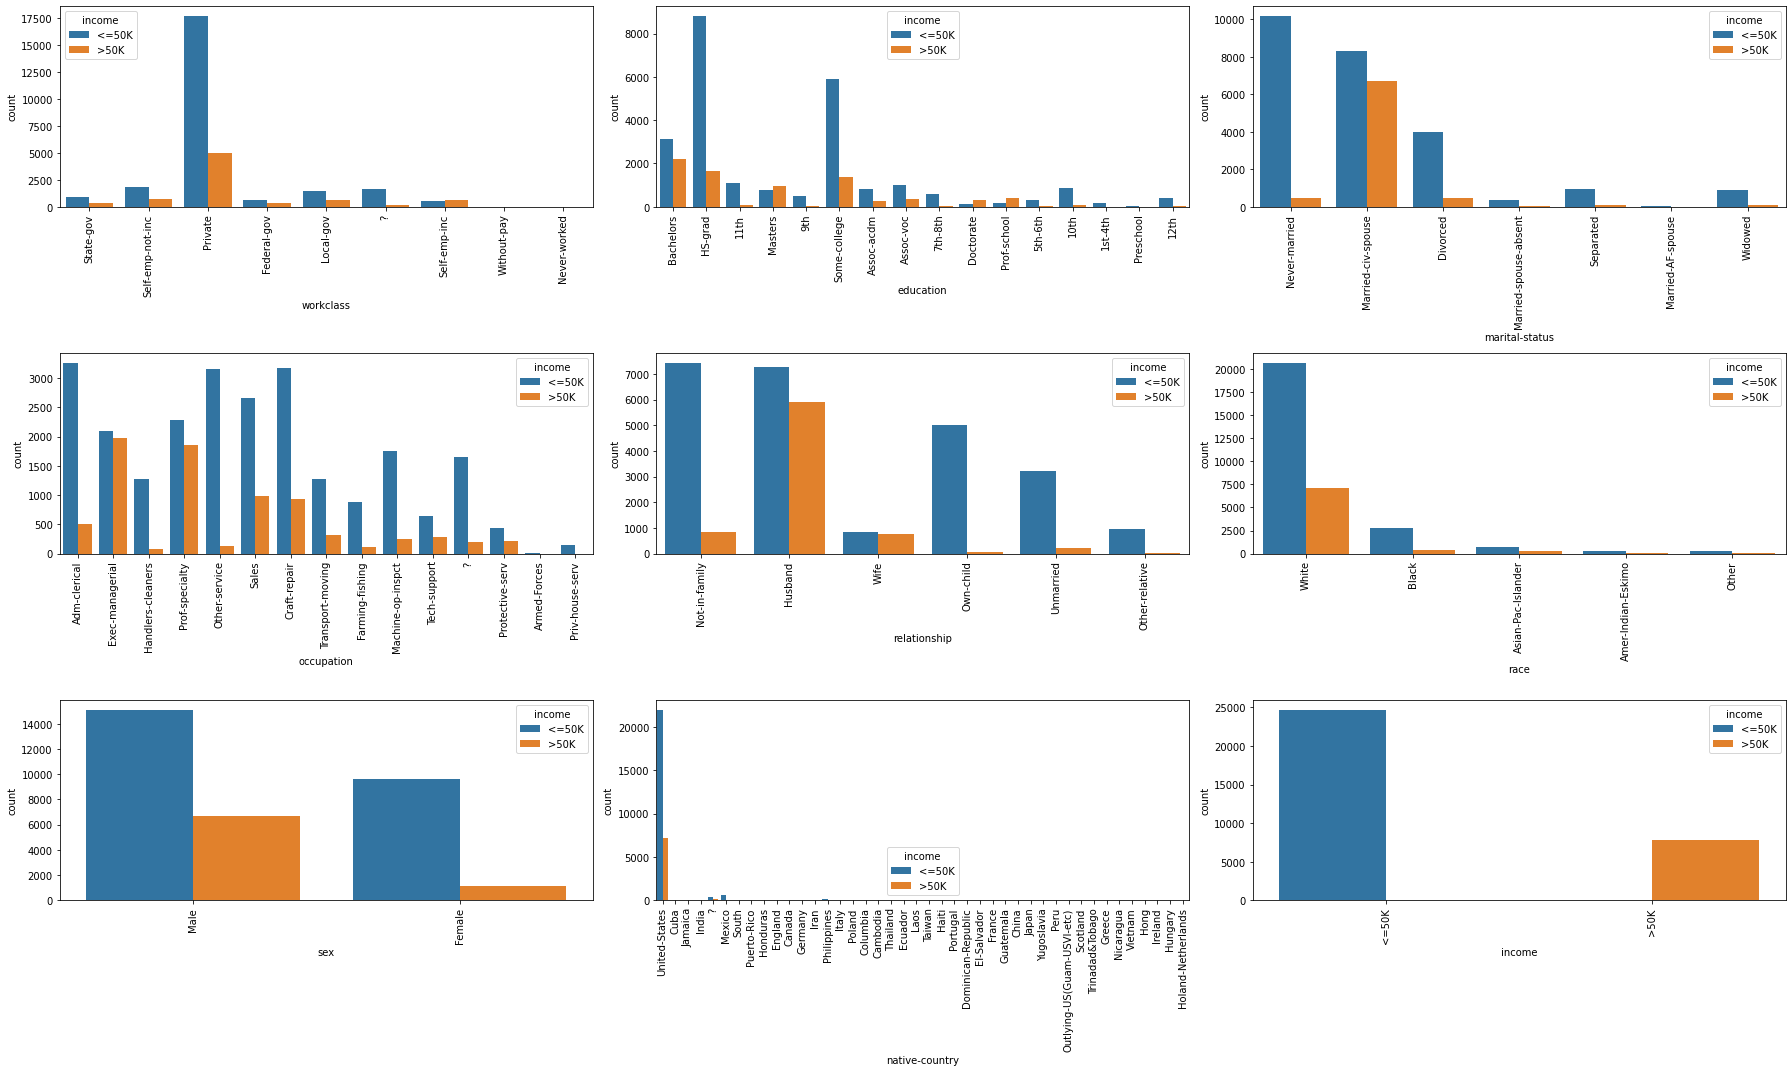

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(25,15))
for i, col in enumerate(df.select_dtypes(include='object')):
    plt.subplot(3, 3, i+1)
    sns.countplot(x=col, data=df, hue='income')
    plt.xticks(rotation=90)
    plt.tight_layout()

***
**Outlier detection!** They could have a constructive or destructive effect on model training! It depends on the type of the task and the source or cause of the data point. We draw boxplots to reveal the outliers.

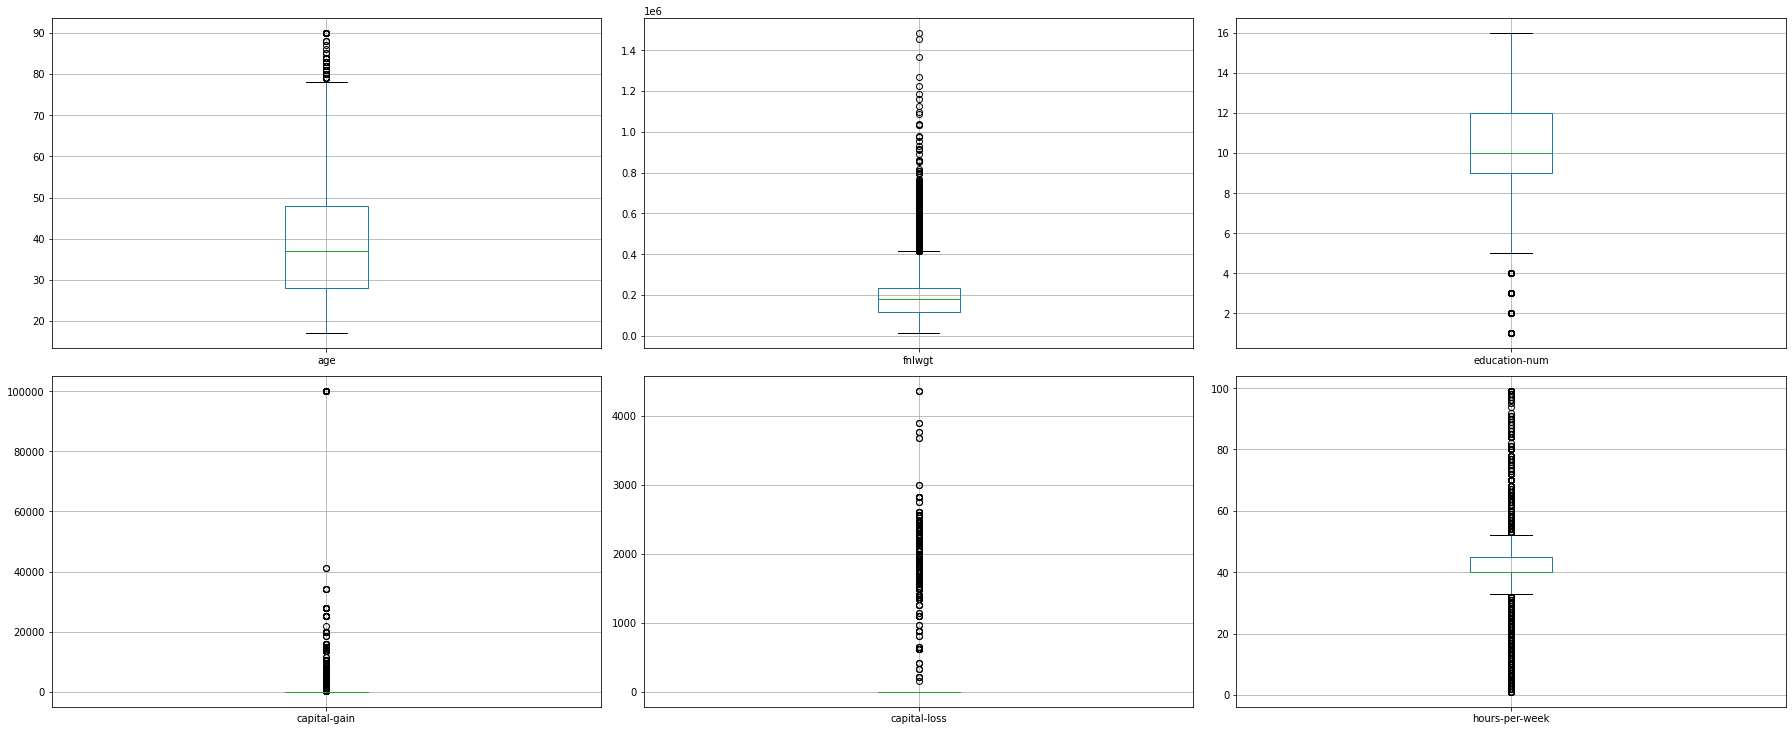

In [13]:
plt.figure(figsize=(25,15))
for i, col in enumerate(df.select_dtypes(exclude='object')):
    plt.subplot(3, 3, i+1)
    df.boxplot(column=[col])
    plt.tight_layout()

The interesting ones are **capital-gain** and **capital-loss** which capture my attention.
***

# Corelation tests
***
+ Data correlation and visualization can assist you in deciding which ML algorithm to employ.   
If your data does not have a linear correlation, you could consider using polynomial regression, SVMs or Random Forests.  

+ Correlation analysis also can help you in detecting Multi-Collinearity and prevent its harmful effect on the machine learning model.


## Correlation between categorical variables
***
*Chi-square Test of Independence*

In [14]:
for col in df.select_dtypes(include=['object']).columns:
  print("\n", col, "\n", df[col].value_counts())


 workclass 
 Private             22673
Self-emp-not-inc     2540
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

 education 
 HS-grad         10494
Some-college     7282
Bachelors        5353
Masters          1722
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           645
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           332
1st-4th           166
Preschool          50
Name: education, dtype: int64

 marital-status 
 Married-civ-spouse       14970
Never-married            10667
Divorced                  4441
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital-status, dtype: int64

 occupation 
 Prof-specialty       4136
Craft-repair  

In [15]:
from scipy.stats import chi2_contingency
selection=[]
for col in df.select_dtypes(include=['object']).columns:
  selection.append(col)

while selection:
  feature1 = selection[0]
  selection.remove(feature1)
  for feature2 in selection:
    print("\n",feature1, "vs", feature2, ":")
    tab = pd.crosstab(index=df[feature1] , columns=df[feature2])
    print(tab)
    chi2, p, dof, expected = chi2_contingency(tab.values)
    print("Chi-square statistics is %0.3f and p_value is %0.15f" %(chi2, p))



 workclass vs education :
education         10th  11th  12th  ...  Preschool  Prof-school  Some-college
workclass                           ...                                      
?                  100   118    40  ...          5           18           514
Federal-gov          6     9     5  ...          0           29           254
Local-gov           31    36    19  ...          4           29           387
Never-worked         2     1     0  ...          0            0             2
Private            695   923   333  ...         40          257          5086
Self-emp-inc        19    14     7  ...          0           81           226
Self-emp-not-inc    67    60    19  ...          0          131           485
State-gov           13    14    10  ...          1           31           325
Without-pay          0     0     0  ...          0            0             3

[9 rows x 16 columns]
Chi-square statistics is 2570.961 and p_value is 0.000000000000000

 workclass vs marital-st

Since p_value<0.05. There is association between any two features except: *workclass vs native-country*.

## Correlation between continuous variables

### Spearman Rank Correlation

In [16]:
# Spearman Rank Correlation
from scipy.stats import spearmanr
selection=[]
for col in df.select_dtypes(exclude=['object']).columns:
  selection.append(col)
while selection:
  feature1 = selection[0]
  selection.remove(feature1)
  for feature2 in selection:
      print("\n", feature1, "vs", feature2, ":")
      print(spearmanr(df[feature1], df[feature2]))


 age vs fnlwgt :
SpearmanrResult(correlation=-0.07791652043555697, pvalue=5.375779343481868e-45)

 age vs education-num :
SpearmanrResult(correlation=0.06619916283572935, pvalue=6.212052959596106e-33)

 age vs capital-gain :
SpearmanrResult(correlation=0.12490506497667868, pvalue=2.8726030747629165e-113)

 age vs capital-loss :
SpearmanrResult(correlation=0.05843274768837706, pvalue=5.149575314747697e-26)

 age vs hours-per-week :
SpearmanrResult(correlation=0.14276264101075878, pvalue=1.0286492302564067e-147)

 fnlwgt vs education-num :
SpearmanrResult(correlation=-0.03582848848380919, pvalue=1.0158364931510683e-10)

 fnlwgt vs capital-gain :
SpearmanrResult(correlation=-0.006031839333850717, pvalue=0.27659854888293844)

 fnlwgt vs capital-loss :
SpearmanrResult(correlation=-0.0069102583807442945, pvalue=0.21260273354303774)

 fnlwgt vs hours-per-week :
SpearmanrResult(correlation=-0.02188210942105498, pvalue=7.899815706735961e-05)

 education-num vs capital-gain :
SpearmanrResult(co

Since pvalue<0.05. There is association between any two features except: *fnlwgt vs hours-per-week*.

### Heatmaps

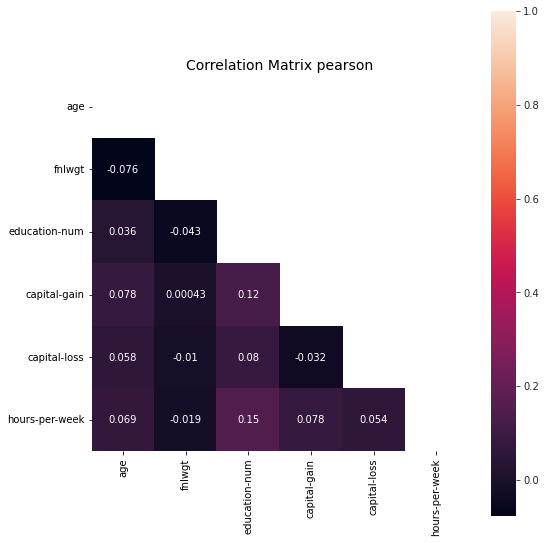

In [17]:
import numpy as np
fig, ax = plt.subplots(figsize=(8,8))
corr = df.select_dtypes(exclude=['object']).corr(method="pearson")
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("dark"):
    sns.heatmap(corr, annot=True,vmax=1, square=True, mask=mask)
ax.set_title("Correlation Matrix pearson", fontsize=14)
plt.tight_layout()
plt.show()

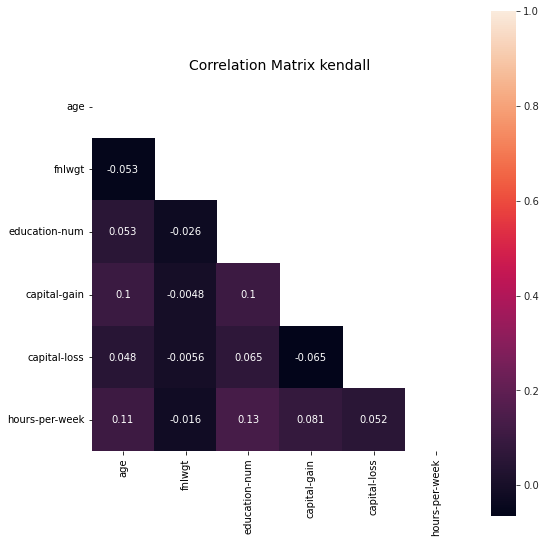

In [18]:
fig, ax = plt.subplots(figsize=(8,8))
corr = df.select_dtypes(exclude=['object']).corr(method="kendall")
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("dark"):
    sns.heatmap(corr, annot=True,vmax=1, square=True, mask=mask)
ax.set_title("Correlation Matrix kendall", fontsize=14)
plt.tight_layout()
plt.show()

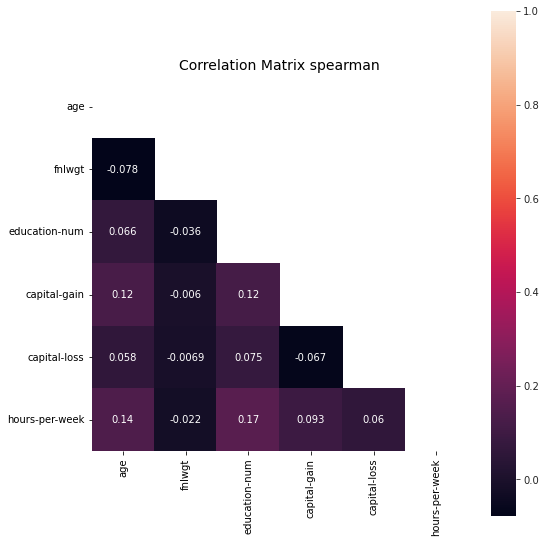

In [19]:
fig, ax = plt.subplots(figsize=(8,8))
corr = df.select_dtypes(exclude=['object']).corr(method="spearman")
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("dark"):
    sns.heatmap(corr, annot=True,vmax=1, square=True, mask=mask)
ax.set_title("Correlation Matrix spearman", fontsize=14)
plt.tight_layout()
plt.show()

# Machine Learning Algorithms

In [20]:
from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()

In [21]:
from sklearn.metrics import accuracy_score, roc_auc_score
def build(model, name, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    print('Accuracy of ', name, f': on train-set = {model.score(X_train, y_train)*100:.2f}%, on test-set = {model.score(X_test, y_test)*100:.2f}%')
    y_score = model.predict(X_test)
    print("\n roc_auc_score:")
    print(roc_auc_score(y_test, y_score))
    return model

If you conclude that the outliers harm the model training use the following code to remove them.

In [22]:

#for col in df.select_dtypes(exclude=['object']).columns:
#    Q1 = df[col].quantile(0.25)
#    Q3 = df[col].quantile(0.75)
#    IQR = Q3 - Q1    #IQR is interquartile range.
#    filter = (df[col] >= Q1 - 1.5 * IQR) & (df[col] <= Q3 + 1.5 *IQR)
#    df = df.loc[filter] 


It is impossible to feed any machine learning or deep learning model with categorical data. Consequently, these data must convert to boolean or numerical data.

In [23]:
df['income'] = pd.get_dummies(df['income'], prefix='income', drop_first=True)
y = df.income
df = df.drop(columns=['income'])

In [24]:
# convert numerical features to categorical
for col in df.select_dtypes(exclude='object'):
  df[col]=pd.cut(df[col], 20)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32537 entries, 0 to 32536
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             32537 non-null  category
 1   workclass       32537 non-null  object  
 2   fnlwgt          32537 non-null  category
 3   education       32537 non-null  object  
 4   education-num   32537 non-null  category
 5   marital-status  32537 non-null  object  
 6   occupation      32537 non-null  object  
 7   relationship    32537 non-null  object  
 8   race            32537 non-null  object  
 9   sex             32537 non-null  object  
 10  capital-gain    32537 non-null  category
 11  capital-loss    32537 non-null  category
 12  hours-per-week  32537 non-null  category
 13  native-country  32537 non-null  object  
dtypes: category(6), object(8)
memory usage: 2.2+ MB
None


In [25]:
# Convert categorical features to boolean type
X = pd.get_dummies(df, drop_first=True)

In [26]:
# Split the dataset into training and testing parts
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [27]:
from imblearn.combine import SMOTETomek
sme = SMOTETomek()
bX_train, by_train = sme.fit_resample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

##  Support Vector Machine

In [28]:
# Feature selection
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
clf = LinearSVC()
clf = clf.fit(bX_train, by_train)
model = SelectFromModel(clf, prefit=True)
feature_idx = model.get_support()
feature_name = X_train.columns[feature_idx]
print(feature_name)
sX_train = model.transform(bX_train)
sX_test = model.transform(X_test)

Index(['age_(27.95, 31.6]', 'age_(31.6, 35.25]', 'age_(35.25, 38.9]',
       'age_(38.9, 42.55]', 'age_(42.55, 46.2]', 'age_(46.2, 49.85]',
       'age_(49.85, 53.5]', 'age_(53.5, 57.15]', 'age_(57.15, 60.8]',
       'age_(60.8, 64.45]', 'age_(64.45, 68.1]', 'age_(68.1, 71.75]',
       'age_(71.75, 75.4]', 'age_(75.4, 79.05]', 'age_(82.7, 86.35]',
       'workclass_Federal-gov', 'workclass_Without-pay',
       'fnlwgt_(1042979.0, 1116600.0]', 'fnlwgt_(1190221.0, 1263842.0]',
       'education_Bachelors', 'education_Doctorate', 'education_Masters',
       'education_Prof-school', 'education-num_(12.25, 13.0]',
       'education-num_(13.75, 14.5]', 'education-num_(14.5, 15.25]',
       'education-num_(15.25, 16.0]', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse', 'occupation_Exec-managerial',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
       'occupation_Tech-support', 'relation

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [29]:
model = build(LinearSVC(), 'LinearSVC', sX_train, sX_test, by_train, y_test)
y_score = model.predict(sX_test)
name = 'LinearSVC'
fpr[name], tpr[name], _ = roc_curve(y_test, y_score)
roc_auc[name] = auc(fpr[name], tpr[name])

Accuracy of  LinearSVC : on train-set = 86.84%, on test-set = 84.20%

 roc_auc_score:
0.802491743848236


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


## Logistic Regression

In [30]:
# Feature selection
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
clf = LogisticRegression(max_iter=10000)
clf = clf.fit(bX_train, by_train)
model = SelectFromModel(clf, prefit=True)
feature_idx = model.get_support()
feature_name = X_train.columns[feature_idx]
print(feature_name)
sX_train = model.transform(bX_train)
sX_test = model.transform(X_test)

Index(['age_(27.95, 31.6]', 'age_(31.6, 35.25]', 'age_(35.25, 38.9]',
       'age_(38.9, 42.55]', 'age_(42.55, 46.2]', 'age_(46.2, 49.85]',
       'age_(49.85, 53.5]', 'age_(53.5, 57.15]', 'age_(57.15, 60.8]',
       'age_(60.8, 64.45]', 'age_(64.45, 68.1]', 'age_(68.1, 71.75]',
       'age_(71.75, 75.4]', 'age_(75.4, 79.05]', 'age_(82.7, 86.35]',
       'workclass_Federal-gov', 'fnlwgt_(527632.0, 601253.0]',
       'education_Assoc-voc', 'education_Bachelors', 'education_Doctorate',
       'education_Masters', 'education_Prof-school', 'education_Some-college',
       'education-num_(9.25, 10.0]', 'education-num_(10.75, 11.5]',
       'education-num_(12.25, 13.0]', 'education-num_(13.75, 14.5]',
       'education-num_(14.5, 15.25]', 'education-num_(15.25, 16.0]',
       'marital-status_Married-AF-spouse', 'marital-status_Married-civ-spouse',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupati

In [31]:
model = build(LogisticRegression(max_iter=10000), 'LogisticRegression', sX_train, sX_test, by_train, y_test)
y_score = model.predict(sX_test)
name = 'LogisticRegression'
fpr[name], tpr[name], _ = roc_curve(y_test, y_score)
roc_auc[name] = auc(fpr[name], tpr[name])

Accuracy of  LogisticRegression : on train-set = 87.84%, on test-set = 85.19%

 roc_auc_score:
0.8085271149405309


## Naive Bayes

In [34]:
from sklearn.naive_bayes import MultinomialNB
model = build(MultinomialNB(), 'Naive Bayes', sX_train, sX_test, by_train, y_test)
y_score = model.predict(sX_test)
name = 'Naive Bayes'
fpr[name], tpr[name], _ = roc_curve(y_test, y_score)
roc_auc[name] = auc(fpr[name], tpr[name])

Accuracy of  Naive Bayes : on train-set = 69.50%, on test-set = 72.80%

 roc_auc_score:
0.6061502640313196


## Decision Tree

In [35]:
from sklearn.tree import DecisionTreeClassifier
model = build(DecisionTreeClassifier(), 'DecisionTreeClassifier', sX_train, sX_test, by_train, y_test)
y_score = model.predict(sX_test)
name = 'DecisionTreeClassifier'
fpr[name], tpr[name], _ = roc_curve(y_test, y_score)
roc_auc[name] = auc(fpr[name], tpr[name])

Accuracy of  DecisionTreeClassifier : on train-set = 92.48%, on test-set = 81.50%

 roc_auc_score:
0.7464443196020493


## Boosting Decision Tree

In [36]:
from sklearn.ensemble import AdaBoostClassifier
model = build(AdaBoostClassifier(DecisionTreeClassifier(min_samples_split=10,max_depth=4),n_estimators=10,learning_rate=0.6), 'AdaBoostClassifier', sX_train, sX_test, by_train, y_test)
y_score = model.predict(sX_test)
name = 'AdaBoostClassifier'
fpr[name], tpr[name], _ = roc_curve(y_test, y_score)
roc_auc[name] = auc(fpr[name], tpr[name])

Accuracy of  AdaBoostClassifier : on train-set = 85.98%, on test-set = 84.27%

 roc_auc_score:
0.7843186398662462


## Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier
model = build(RandomForestClassifier(n_estimators=30, max_depth=40), 'RandomForestClassifier', sX_train, sX_test, by_train, y_test)
y_score = model.predict(sX_test)
name = 'RandomForestClassifier'
fpr[name], tpr[name], _ = roc_curve(y_test, y_score)
roc_auc[name] = auc(fpr[name], tpr[name])

Accuracy of  RandomForestClassifier : on train-set = 91.78%, on test-set = 83.45%

 roc_auc_score:
0.7636593789056357


# Deep Learning

In [38]:
# Feature selection
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
clf = LogisticRegression(max_iter=10000)
clf = clf.fit(bX_train, by_train)
model = SelectFromModel(clf, prefit=True)
feature_idx = model.get_support()
feature_name = X_train.columns[feature_idx]
print(feature_name)
sX_train = model.transform(bX_train)
sX_test = model.transform(X_test)

Index(['age_(27.95, 31.6]', 'age_(31.6, 35.25]', 'age_(35.25, 38.9]',
       'age_(38.9, 42.55]', 'age_(42.55, 46.2]', 'age_(46.2, 49.85]',
       'age_(49.85, 53.5]', 'age_(53.5, 57.15]', 'age_(57.15, 60.8]',
       'age_(60.8, 64.45]', 'age_(64.45, 68.1]', 'age_(68.1, 71.75]',
       'age_(71.75, 75.4]', 'age_(75.4, 79.05]', 'age_(82.7, 86.35]',
       'workclass_Federal-gov', 'fnlwgt_(527632.0, 601253.0]',
       'education_Assoc-voc', 'education_Bachelors', 'education_Doctorate',
       'education_Masters', 'education_Prof-school', 'education_Some-college',
       'education-num_(9.25, 10.0]', 'education-num_(10.75, 11.5]',
       'education-num_(12.25, 13.0]', 'education-num_(13.75, 14.5]',
       'education-num_(14.5, 15.25]', 'education-num_(15.25, 16.0]',
       'marital-status_Married-AF-spouse', 'marital-status_Married-civ-spouse',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupati

## TPU & GPU

In [ ]:
# test TPU
%tensorflow_version 2.x
import tensorflow as tf
print("Tensorflow version " + tf.__version__)

try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

In [ ]:
# test GPU

import tensorflow as tf
print("Tensorflow version " + tf.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
tf.config.experimental.list_physical_devices('GPU')

tf.debugging.set_log_device_placement(True)

## Neural Network

In [41]:
from sklearn.model_selection import train_test_split
dX_train, dX_eval, dy_train, dy_eval = train_test_split(sX_train, by_train, test_size=0.2)
print(dX_train.shape)
dim=dX_train.shape[1]

(30699, 75)


In [42]:
from keras import layers
from keras import models
from keras import optimizers
from keras import losses
from keras import regularizers
from keras import metrics
from tensorflow import keras

In [43]:
model=models.Sequential()
model.add(layers.Dense(512,kernel_regularizer=regularizers.l2(0.003),activation='relu',input_shape=(dim,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512,kernel_regularizer=regularizers.l2(0.003),activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16,kernel_regularizer=regularizers.l2(0.003),activation='relu'))
model.add(layers.Dense(256,kernel_regularizer=regularizers.l2(0.003),activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4,kernel_regularizer=regularizers.l2(0.003),activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['BinaryAccuracy', 'AUC'])

In [44]:
model.fit(dX_train,dy_train,epochs=1024,batch_size=320000,validation_data=(dX_eval,dy_eval))

Epoch 1/1024
1/1 [==============================] - 2s 2s/step - loss: 3.5364 - binary_accuracy: 0.4964 - auc: 0.2614 - val_loss: 2.8101 - val_binary_accuracy: 0.4610 - val_auc: 0.6399
Epoch 2/1024
1/1 [==============================] - 0s 166ms/step - loss: 2.9703 - binary_accuracy: 0.4357 - auc: 0.4238 - val_loss: 2.7859 - val_binary_accuracy: 0.4929 - val_auc: 0.7188
Epoch 3/1024
1/1 [==============================] - 0s 152ms/step - loss: 2.8398 - binary_accuracy: 0.4218 - auc: 0.5243 - val_loss: 2.7513 - val_binary_accuracy: 0.4937 - val_auc: 0.7687
Epoch 4/1024
1/1 [==============================] - 0s 149ms/step - loss: 2.7717 - binary_accuracy: 0.4417 - auc: 0.6006 - val_loss: 2.7034 - val_binary_accuracy: 0.4937 - val_auc: 0.8352
Epoch 5/1024
1/1 [==============================] - 0s 153ms/step - loss: 2.7187 - binary_accuracy: 0.4580 - auc: 0.6496 - val_loss: 2.6420 - val_binary_accuracy: 0.4937 - val_auc: 0.7955
Epoch 6/1024
1/1 [==============================] - 0s 149ms/st

In [45]:
y_score = model.predict(sX_test)
name = 'Deep Learning'
fpr[name], tpr[name], _ = roc_curve(y_test, y_score)
roc_auc[name] = auc(fpr[name], tpr[name])

# Model Evaluation

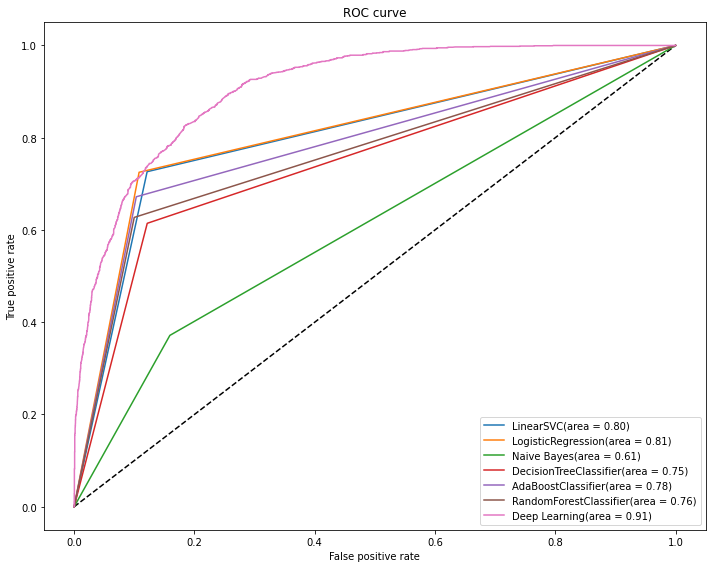

In [46]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.plot([0, 1], [0, 1], 'k--')
for item in fpr:
    plt.plot(fpr[item], tpr[item], label=item + '(area = %0.2f)' % roc_auc[item])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.tight_layout()
plt.show()
